In [56]:
import pandas as pd
%matplotlib inline

In [50]:
df = pd.read_csv("./data/trade_20181129.csv")
df = df[df["symbol"] == "XBTUSD"]
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%dD%H:%M:%S.%f")


In [51]:
df.head(10)


,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
208517,2018-11-29 00:00:03.027688,XBTUSD,Sell,2000,4219.0,ZeroMinusTick,a7d06bff-a6fa-3903-2ef1-76f2373737d4,47404000,0.474040,2000.0
208518,2018-11-29 00:00:03.693373,XBTUSD,Buy,295,4219.5,PlusTick,8e5846b5-c0b6-3bf5-52b4-742bd1f7ea9c,6991205,0.069912,295.0
208519,2018-11-29 00:00:03.748240,XBTUSD,Sell,250,4219.0,MinusTick,d7ec3328-08d9-75af-8c43-aadd5c9fb3ed,5925500,0.059255,250.0
208520,2018-11-29 00:00:04.293173,XBTUSD,Sell,27,4219.0,ZeroMinusTick,a432199d-1cf0-848d-a8be-c2a372c6669a,639954,0.006400,27.0
208521,2018-11-29 00:00:04.425937,XBTUSD,Buy,1,4219.5,PlusTick,df7f4746-1429-2ff2-5f71-ebecf87200e5,23699,0.000237,1.0
208522,2018-11-29 00:00:04.456559,XBTUSD,Buy,20,4219.5,ZeroPlusTick,d60a6edb-e8e6-4337-799b-43d63beba7b0,473980,0.004740,20.0
208523,2018-11-29 00:00:04.506095,XBTUSD,Sell,2000,4219.0,MinusTick,bdb49ae5-972c-06d4-d46a-fad77f6624ad,47404000,0.474040,2000.0
208524,2018-11-29 00:00:04.544392,XBTUSD,Sell,2000,4219.0,ZeroMinusTick,6593141e-49e9-46d7-4b05-adbc8369642c,47404000,0.474040,2000.0
208525,2018-11-29 00:00:04.672937,XBTUSD,Sell,400,4219.0,ZeroMinusTick,c8d09d6b-eb2d-b3cf-c8d4-1f1d1c3be1d6,9480800,0.094808,400.0
208526,2018-11-29 00:00:04.754371,XBTUSD,Buy,1000,4219.5,PlusTick,a1e21ac9-38fc-0e55-be5f-2f34a6244207,23699000,0.236990,1000.0


## Time Bars

In [60]:
def get_time_bars(raw_data, minutes):
    start = raw_data["timestamp"].min().floor("Min")
    end = raw_data["timestamp"].max().ceil("Min")
    
    bars = []
    for date in pd.date_range(start, end, freq=f"{minutes}Min"):
        sub_data = raw_data[raw_data["timestamp"].dt.floor("Min") == date].sort_values("timestamp").reindex()
        
        if sub_data.empty:
            print("no data at:", date)
            continue
        wap = (sub_data["size"] * sub_data["price"]).sum() / sub_data["size"].sum()

        bar = {"timestamp": date,
               "vwap": wap,
               "open": sub_data["price"].iloc[0],
               "close": sub_data["price"].iloc[-1],
               "high": sub_data["price"].max(),
               "low": sub_data["price"].min(),
               "volume": sub_data["size"].sum()
              }
        bars.append(bar)
    
    return pd.DataFrame(bars)

time_bars = get_time_bars(df, 15)

no data at: 2018-11-30 00:00:00


In [61]:
time_bars.head()

,close,high,low,open,timestamp,volume,vwap
0,4223.0,4225.0,4219.0,4219.0,2018-11-29 00:00:00,1636048,4222.680157
1,4215.5,4215.5,4205.5,4205.5,2018-11-29 00:15:00,1559481,4210.247168
2,4203.0,4206.0,4194.5,4200.0,2018-11-29 00:30:00,1257557,4200.786527
3,4212.0,4212.5,4212.0,4212.5,2018-11-29 00:45:00,316451,4212.195529
4,4212.0,4217.5,4212.0,4217.0,2018-11-29 01:00:00,641416,4215.473256


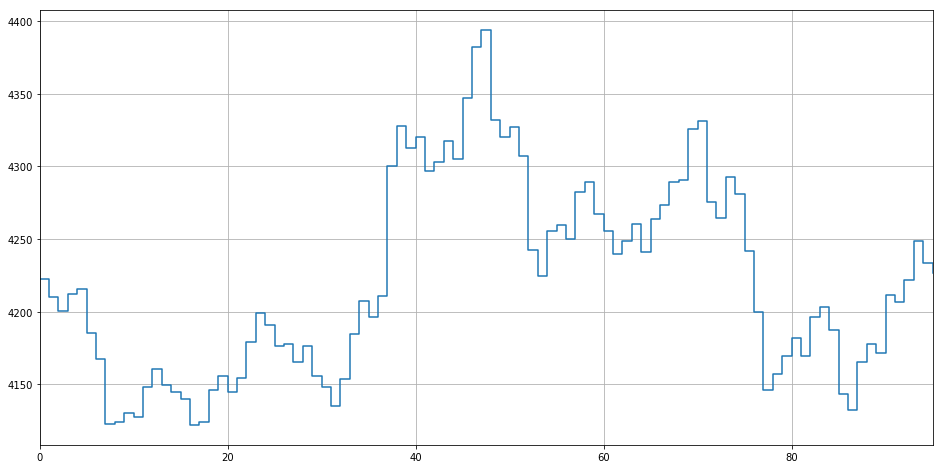

In [64]:
time_bars["vwap"].plot(grid=True, figsize=(16, 8), drawstyle="steps-post")

In [53]:
def compute_vwap(df):
    q = df['foreignNotional']
    p = df['price']
    vwap = (p * q).sum() / q.sum()
    df['vwap'] = vwap
    return df

data_timeidx = df.set_index('timestamp')
data_time_grp = data_timeidx.groupby(pd.Grouper(freq='15Min'))
num_time_bars = len(data_time_grp) # comes in handy later
data_time_vwap = data_time_grp.apply(compute_vwap)


In [54]:
data_time_vwap.head()

,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,vwap
timestamp,,,,,,,,,,
2018-11-29 00:00:03.027688,XBTUSD,Sell,2000,4219.0,ZeroMinusTick,a7d06bff-a6fa-3903-2ef1-76f2373737d4,47404000,0.474040,2000.0,4232.371359
2018-11-29 00:00:03.693373,XBTUSD,Buy,295,4219.5,PlusTick,8e5846b5-c0b6-3bf5-52b4-742bd1f7ea9c,6991205,0.069912,295.0,4232.371359
2018-11-29 00:00:03.748240,XBTUSD,Sell,250,4219.0,MinusTick,d7ec3328-08d9-75af-8c43-aadd5c9fb3ed,5925500,0.059255,250.0,4232.371359
2018-11-29 00:00:04.293173,XBTUSD,Sell,27,4219.0,ZeroMinusTick,a432199d-1cf0-848d-a8be-c2a372c6669a,639954,0.006400,27.0,4232.371359
2018-11-29 00:00:04.425937,XBTUSD,Buy,1,4219.5,PlusTick,df7f4746-1429-2ff2-5f71-ebecf87200e5,23699,0.000237,1.0,4232.371359


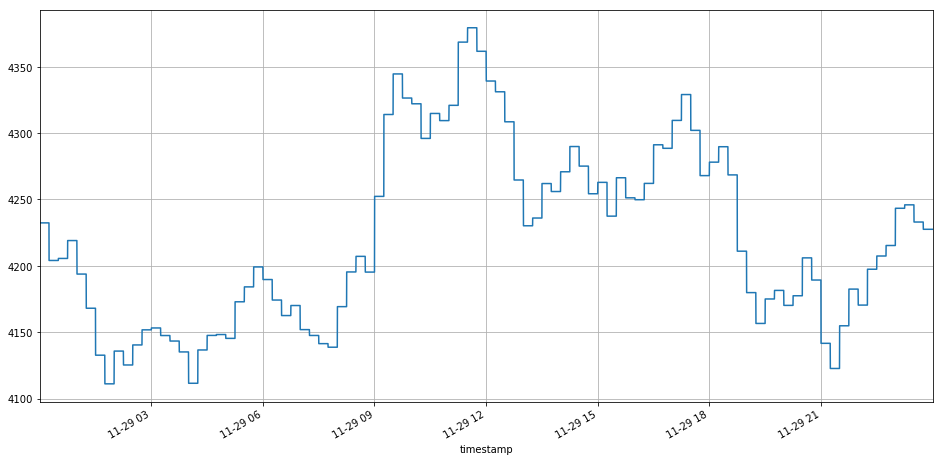

In [57]:
data_time_vwap["vwap"].plot(grid=True, figsize=(16, 8))